In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
from mpl_toolkits.mplot3d import Axes3D

from itertools import product

In [5]:
df = pd.read_csv('Data/my/User_Question_Answer.csv', low_memory=False)

In [6]:
df_q = pd.read_csv('Data/my/Questions_Answers.csv')

In [7]:
df = df[['user_id', 'answer_id']].copy()

In [8]:
matrix = pd.get_dummies(df,  'answer_id')

In [9]:
matrix.drop('answer_id_2018-09-12 19:09:06', axis=1, inplace=True)

In [10]:
matrix.user_id.nunique()

7243

In [11]:
data = matrix.groupby('user_id')[matrix.columns[1:]].sum().reset_index()

In [13]:
# Sanity Check
df[df.user_id == 89].answer_id.values

array(['60725', '60736', '60746', '60761', '60763', '60767', '60771',
       '60775', '60780', '60791', '60803', '60810', '60816', '60821',
       '60829', '60837', '60842', '60855', '60861', '60868', '61608',
       '61610', '61630', '61637', '61662', '61678', '61686', '61688',
       '61698', '61754', '61786', '61788', '61847', '61851', '61860',
       '61918', '61923', '61925', '61930', '61949', '62000', '62052'],
      dtype=object)

In [14]:
data.columns[data.iloc[0]>0]

Index(['user_id', 'answer_id_60725', 'answer_id_60736', 'answer_id_60746',
       'answer_id_60761', 'answer_id_60763', 'answer_id_60767',
       'answer_id_60771', 'answer_id_60775', 'answer_id_60780',
       'answer_id_60791', 'answer_id_60803', 'answer_id_60810',
       'answer_id_60816', 'answer_id_60821', 'answer_id_60829',
       'answer_id_60837', 'answer_id_60842', 'answer_id_60855',
       'answer_id_60861', 'answer_id_60868', 'answer_id_61608',
       'answer_id_61610', 'answer_id_61630', 'answer_id_61637',
       'answer_id_61662', 'answer_id_61678', 'answer_id_61686',
       'answer_id_61688', 'answer_id_61698', 'answer_id_61754',
       'answer_id_61786', 'answer_id_61788', 'answer_id_61847',
       'answer_id_61851', 'answer_id_61860', 'answer_id_61918',
       'answer_id_61923', 'answer_id_61925', 'answer_id_61930',
       'answer_id_61949', 'answer_id_62000', 'answer_id_62052'],
      dtype='object')

After we have the data in the right form, we can have a premilinary model to train

In [15]:
data.columns

Index(['user_id', 'answer_id_60570', 'answer_id_60571', 'answer_id_60724',
       'answer_id_60725', 'answer_id_60726', 'answer_id_60727',
       'answer_id_60728', 'answer_id_60732', 'answer_id_60733',
       ...
       'answer_id_62302', 'answer_id_62303', 'answer_id_62304',
       'answer_id_62305', 'answer_id_62306', 'answer_id_62307',
       'answer_id_62308', 'answer_id_62309', 'answer_id_62310',
       'answer_id_62311'],
      dtype='object', length=490)

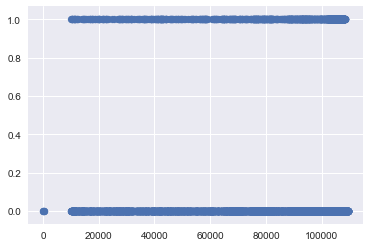

In [16]:
plt.scatter(data['user_id'], data['answer_id_60571'])

In [18]:
data.shape

(7243, 490)

## Heierarchical Clustering (Bottom Up)

In [45]:
data.set_index('user_id', inplace=True)

In [46]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, ward, single

In [47]:
model = AgglomerativeClustering(n_clusters=3)
model = model.fit(data)

In [48]:
# Children of hierarchical clustering
children = model.children_

# Distances between each pair of children
# Since we don't have this information, we can use a uniform one for plotting
distance = np.arange(children.shape[0])

# The number of observations contained in each cluster level
no_of_observations = np.arange(2, children.shape[0]+2)

# Create linkage matrix and then plot the dendrogram
linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

In [53]:
plt.rcParams['figure.figsize'] = (20, 15)

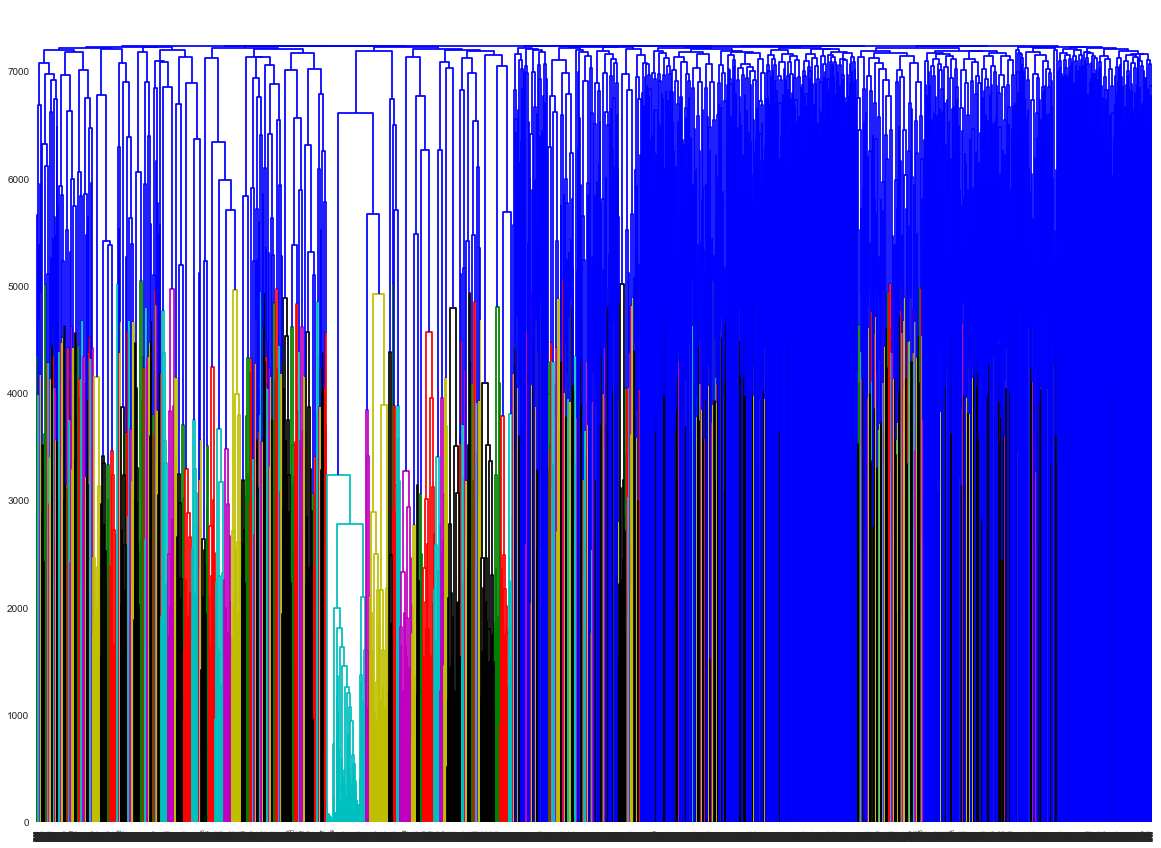

In [55]:
z = dendrogram(linkage_matrix)
z
plt.show()

In [56]:
from sklearn.cluster import DBSCAN

In [58]:
clustering = DBSCAN(eps=3, min_samples=2).fit(data)

In [59]:
clustering.labels_

array([-1, -1, -1, ..., -1,  0,  0], dtype=int64)

In [ ]:
## DBSCAN Clusterinng

In [2]:
## GMM Clustering

# PCA

## Plotting the Clusters

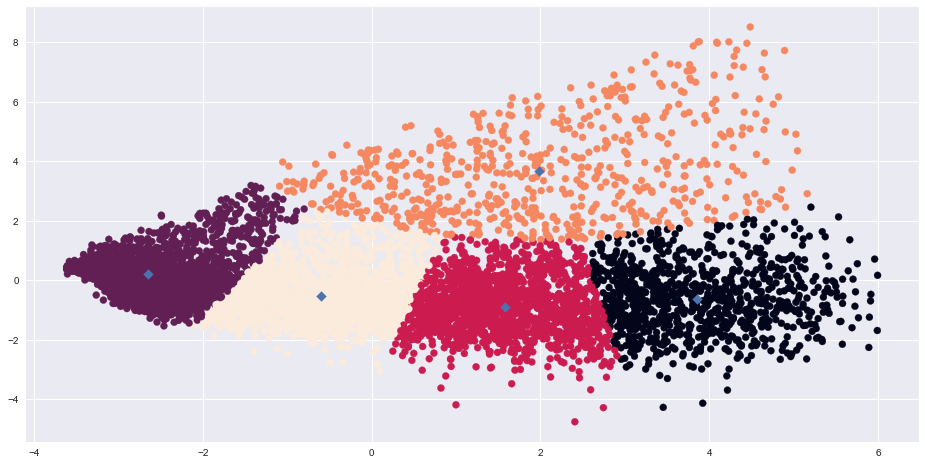

In [49]:
kmeans_5 = KMeans(n_clusters=5, random_state=0, n_jobs=-1)

kmeans_5.fit(pca_df)
y_kmeans = kmeans_5.predict(pca_df)
centers_kmeans = kmeans_5.cluster_centers_
center = pd.DataFrame.from_records(centers_kmeans, columns = ['A', 'B'])

# Plotted the first 2 components as they summarize most of the data and can be visually ploted
fig=plt.figure(figsize=(16, 8))
plt.scatter(pca_df['PC-1'], pca_df['PC-2'], c = y_kmeans)
plt.scatter(center.A, center.B, marker = 'D')

Silhouette coefficients near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.
https://stats.stackexchange.com/questions/183236/what-is-the-relation-between-k-means-clustering-and-pca

In [55]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(center)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
true_centers = pd.DataFrame.from_records(true_centers, columns=data.columns, index = ['Segment_1','Segment_2','Segment_3','Segment_4','Segment_5'])
true_centers

,answer_id_60570,answer_id_60571,answer_id_60724,answer_id_60725,answer_id_60726,answer_id_60727,answer_id_60728,answer_id_60732,answer_id_60733,answer_id_60734,...,answer_id_62302,answer_id_62303,answer_id_62304,answer_id_62305,answer_id_62306,answer_id_62307,answer_id_62308,answer_id_62309,answer_id_62310,answer_id_62311
Segment_1,1.682024,1.361331,1.201902,1.105914,1.043720,1.146929,1.142042,1.595700,1.075342,1.016413,...,1.058995,1.025439,1.413914,1.248358,1.290173,1.220347,1.355056,1.427281,1.276584,1.432389
Segment_2,1.090352,1.040482,1.026538,1.009684,1.003509,1.005431,1.005439,1.198339,1.061197,1.020806,...,1.008134,1.002819,0.977695,1.007379,0.994919,0.995184,1.004950,1.004964,1.006057,0.991654
Segment_3,1.412170,1.255355,1.108577,1.071847,1.030741,1.101789,1.095813,1.478774,1.070510,1.017617,...,1.035226,1.016925,1.270197,1.123332,1.186772,1.148916,1.189568,1.284263,1.146778,1.274681
Segment_4,1.756485,1.141837,1.386873,1.072014,1.022271,1.055784,1.073594,1.226403,1.070106,1.020161,...,1.086875,1.022710,1.077932,1.468140,1.131031,1.058591,1.499821,1.132952,1.419961,1.175260
Segment_5,1.225033,1.145408,1.055026,1.039596,1.017110,1.053472,1.049619,1.339424,1.065757,1.019130,...,1.019023,1.009428,1.119459,1.049595,1.086850,1.071558,1.079837,1.139428,1.062146,1.125286


In [31]:
pca_5.explained_variance_ratio_

array([5.8656481 , 2.37813153, 2.02814209, 1.26961834, 0.69171739])

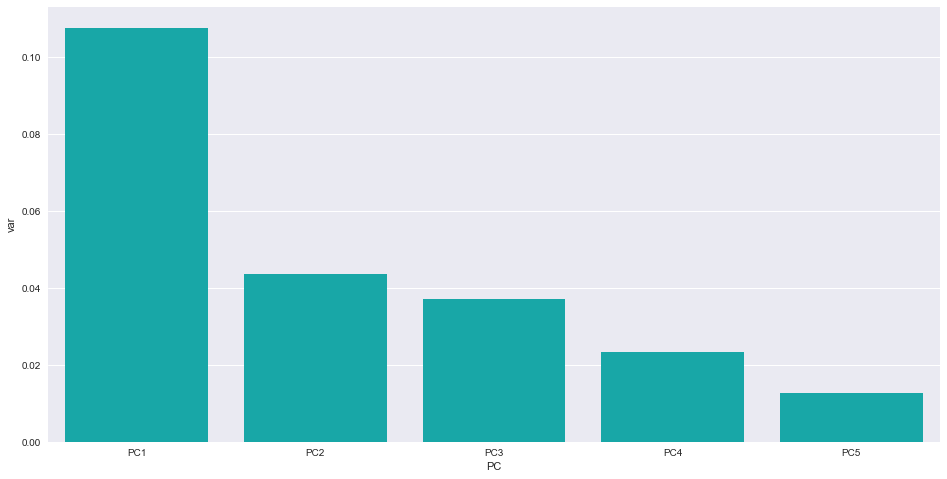

In [42]:
from sklearn.decomposition import PCA

pca_5 = PCA(n_components=5)
pca_5.fit_transform(data)

fig=plt.figure(figsize=(16, 8))
df_VI = pd.DataFrame({'var':pca_5.explained_variance_ratio_,'PC':['PC1','PC2','PC3','PC4', 'PC5']})
sns.barplot(x='PC',y="var", data=df_VI, color="c")

In [39]:
pca_5.explained_variance_ratio_

array([0.10775606, 0.04368794, 0.03725839, 0.02332378, 0.01270746,
       0.01192752, 0.01001726, 0.00928854, 0.00804424, 0.00784858])

first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components. 

In [45]:
# Use only first 2 dimensions as they explan a lot and can be plotted

# PCA by fitting the data with only two dimensions
pca = PCA(n_components=2)
pca.fit_transform(data)

# Transform the data using the PCA fit above
reduced_data = pca.transform(data)

# Create a DataFrame for the reduced data
pca_df = pd.DataFrame.from_records(reduced_data, columns = ['PC-1', 'PC-2'])
pca_df.head()

,PC-1,PC-2
0,-1.679262,-0.127104
1,-1.330687,-0.766584
2,-0.894045,0.286692
3,-2.078110,-0.737747
4,-2.639861,0.429728


In [26]:
pca_df.shape

(7243, 2)